### Optimizing Logistic Regression, Decision Tree, and Random Forest algorithms using Grid Search ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Interpretation
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\User\Python Projects\ML Projects\Assignment 5\vaccine_data.csv")

**Handling Missing Values**
<br>
Nealy half of the observations have null values in either columns 'employment_industry' or 'employment_occupation'. Hence deleting these features.

In [3]:
df = df.drop(columns = ['employment_industry', 'employment_occupation'], axis = 1)

Of the 26,700 observations, only a little over 14,000 observations have information of whether or not the respondent has health insurance. The remaining records are blanks. As information on health insurance is vital in establishing a relation to the H1N1 vaccine, we shall delete the rows with missing health insurance information.

In [4]:
df.dropna(subset = 'health_insurance', inplace = True)

It is observed that there are still null values in multiple columns. As each of these features are vital for establishing a relation to the dependent variable, we shall only consider the rows with all features populated and delete rows with missing values.

In [5]:
df.dropna(inplace = True)

It is observed that all features with 'float64' data type have integer data. Hence, converting all columns with float64 datatype to int datatype.

In [6]:
float_features = df.select_dtypes(include = 'float64').columns
print(float_features)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [7]:
for col in float_features:
    df[col] = df[col].astype(int)
    
#df.info()

**Label Encoding**
<br>
It is observed that few columns such as age_group, education etc have string data. As these values are categorical, we encode these categorical values.

In [8]:
cat_features = df.select_dtypes(include = "object").columns
print (cat_features)

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')


In [9]:
le = LabelEncoder()

for cl in cat_features:
    df[cl] = le.fit_transform(df[cl].astype(str))
    df[cl] = df[cl].astype(int)
#df.info()

### Splitting Data into Train and Test sets ###

In [10]:
# Create class(y) and features(X) from the dataset

y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Performing Logisitic Regression Withouth Grid Search ###

In [11]:
# Setting up Logistic Regression pipeline to scale the features
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [12]:
# Fitting Logistic Regression Algorithm to the training set
# Logistic Regression

logclf = logistic_pipeline
logclf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [13]:
# Predicting y values using the trained algorithm for the X_train data
y_pred = logclf.predict(X_test)

In [14]:
# Evaluating the performance of the Logitics Regression algorithm by comparing the predicted values of y to the actual values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2245  206]
 [ 347  741]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2451
           1       0.78      0.68      0.73      1088

    accuracy                           0.84      3539
   macro avg       0.82      0.80      0.81      3539
weighted avg       0.84      0.84      0.84      3539



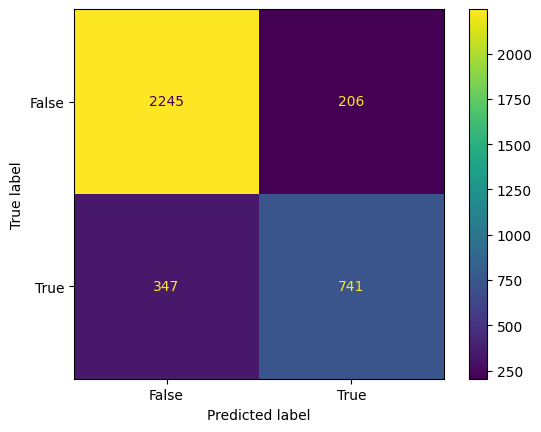

In [15]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [16]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.843741
Precision: 0.782471
Recall: 0.681066
F1 score: 0.728256


It is observed that the Logitistic Regression model without Grid Search resulted in a accuracy of 84%. We can optimize this model to result in a better accuracy using Grid Search

### Performing Logistic Regression With Grid Search ###

In [17]:
# Create class(y) and features(X) from the dataset

y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

In [18]:
# Defining a parameter grid by creating a dictionary of hyper parameters
le_2 = LogisticRegression()
param_dict = {'penalty' : ['l2', 'l1', 'elasticnet', None],\
                'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [19]:
# Definig Grid Search
grid = GridSearchCV(le_2, param_grid = param_dict,\
                     n_jobs=1, scoring='accuracy',error_score=0, verbose = 10)

In [20]:
# Fitting the grid search to the X and y variables
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START penalty=l2, solver=newton-cg...............................
[CV 1/5; 1/12] END penalty=l2, solver=newton-cg;, score=0.850 total time=   0.2s
[CV 2/5; 1/12] START penalty=l2, solver=newton-cg...............................
[CV 2/5; 1/12] END penalty=l2, solver=newton-cg;, score=0.839 total time=   0.2s
[CV 3/5; 1/12] START penalty=l2, solver=newton-cg...............................
[CV 3/5; 1/12] END penalty=l2, solver=newton-cg;, score=0.849 total time=   0.2s
[CV 4/5; 1/12] START penalty=l2, solver=newton-cg...............................
[CV 4/5; 1/12] END penalty=l2, solver=newton-cg;, score=0.825 total time=   0.2s
[CV 5/5; 1/12] START penalty=l2, solver=newton-cg...............................
[CV 5/5; 1/12] END penalty=l2, solver=newton-cg;, score=0.833 total time=   0.1s
[CV 1/5; 2/12] START penalty=l2, solver=lbfgs...................................
[CV 1/5; 2/12] END ....penalty=l2, solver=lbfgs;

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 4/5; 2/12] END ....penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 5/5; 2/12] START penalty=l2, solver=lbfgs...................................
[CV 5/5; 2/12] END ....penalty=l2, solver=lbfgs;, score=0.786 total time=   0.0s
[CV 1/5; 3/12] START penalty=l2, solver=liblinear...............................
[CV 1/5; 3/12] END penalty=l2, solver=liblinear;, score=0.827 total time=   0.0s
[CV 2/5; 3/12] START penalty=l2, solver=liblinear...............................
[CV 2/5; 3/12] END penalty=l2, solver=liblinear;, score=0.829 total time=   0.0s
[CV 3/5; 3/12] START penalty=l2, solver=liblinear...............................
[CV 3/5; 3/12] END penalty=l2, solver=liblinear;, score=0.846 total time=   0.0s
[CV 4/5; 3/12] START penalty=l2, solver=liblinear...............................
[CV 4/5; 3/12] END penalty=l2, solver=liblinear;, score=0.820 total time=   0.0s
[CV 5/5; 3/12] START penalty=l2, solver=liblinear...............................
[CV 5/5; 3/12] END penalty=l

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 5/5; 11/12] END .penalty=None, solver=lbfgs;, score=0.790 total time=   0.0s
[CV 1/5; 12/12] START penalty=None, solver=liblinear............................
[CV 1/5; 12/12] END penalty=None, solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5; 12/12] START penalty=None, solver=liblinear............................
[CV 2/5; 12/12] END penalty=None, solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 12/12] START penalty=None, solver=liblinear............................
[CV 3/5; 12/12] END penalty=None, solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5; 12/12] START penalty=None, solver=liblinear............................
[CV 4/5; 12/12] END penalty=None, solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 12/12] START penalty=None, solver=liblinear............................
[CV 5/5; 12/12] END penalty=None, solver=liblinear;, score=0.000 total time=   0.0s


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local

GridSearchCV(error_score=0, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'penalty': ['l2', 'l1', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=10)

In [21]:
# Predicting the indepdendent variable on the test set
y_pred_le = grid.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred_le))
print(classification_report(y_test, y_pred_le))

[[2244  207]
 [ 347  741]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      2451
           1       0.78      0.68      0.73      1088

    accuracy                           0.84      3539
   macro avg       0.82      0.80      0.81      3539
weighted avg       0.84      0.84      0.84      3539



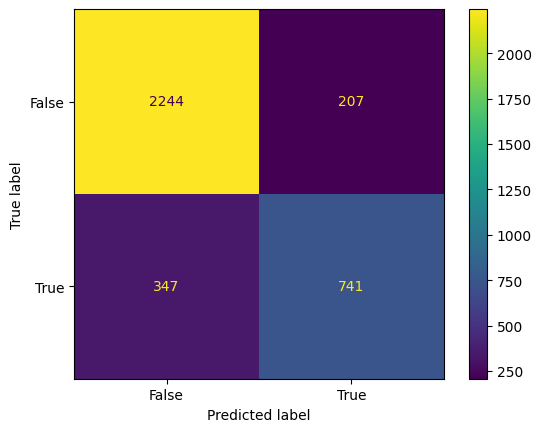

In [23]:
cfm = confusion_matrix(y_test, y_pred_le)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [24]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_le)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_le)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_le)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_le)
print('F1 score: %f' % f1)

Accuracy: 0.843459
Precision: 0.781646
Recall: 0.681066
F1 score: 0.727898


In [25]:
grid.best_params_

{'penalty': None, 'solver': 'newton-cg'}

### Performing Decision Tree Classification Without Grid Search ###

In [26]:
y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

[Text(0.5096822599085366, 0.9545454545454546, 'x[34] <= 0.5\ngini = 0.42\nsamples = 8255\nvalue = [5782, 2473]'),
 Text(0.24818978658536586, 0.8636363636363636, 'x[17] <= 3.5\ngini = 0.17\nsamples = 4085\nvalue = [3702, 383]'),
 Text(0.3789360232469512, 0.9090909090909092, 'True  '),
 Text(0.15141482469512196, 0.7727272727272727, 'x[10] <= 0.5\ngini = 0.114\nsamples = 3400\nvalue = [3193, 207]'),
 Text(0.10789824695121951, 0.6818181818181818, 'x[16] <= 4.5\ngini = 0.08\nsamples = 2941\nvalue = [2818, 123]'),
 Text(0.07593368902439024, 0.5909090909090909, 'x[3] <= 0.5\ngini = 0.061\nsamples = 2464\nvalue = [2387, 77]'),
 Text(0.043254573170731704, 0.5, 'x[20] <= 1.5\ngini = 0.056\nsamples = 2375\nvalue = [2307, 68]'),
 Text(0.019435975609756097, 0.4090909090909091, 'x[22] <= 0.5\ngini = 0.031\nsamples = 1014\nvalue = [998, 16]'),
 Text(0.008384146341463415, 0.3181818181818182, 'x[7] <= 0.5\ngini = 0.058\nsamples = 235\nvalue = [228, 7]'),
 Text(0.004573170731707317, 0.22727272727272727,

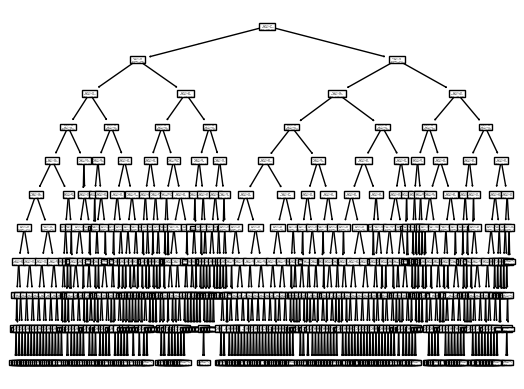

In [27]:
# Fitting the algorithm to the training set
tree_clf_1 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf_1.fit(X_train, y_train)
tree.plot_tree(tree_clf_1)

In [28]:
# Predicting the indepdendent variable on the test set
y_pred_tree = tree_clf_1.predict(X_test)

In [29]:
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[2164  287]
 [ 358  730]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2451
           1       0.72      0.67      0.69      1088

    accuracy                           0.82      3539
   macro avg       0.79      0.78      0.78      3539
weighted avg       0.81      0.82      0.82      3539



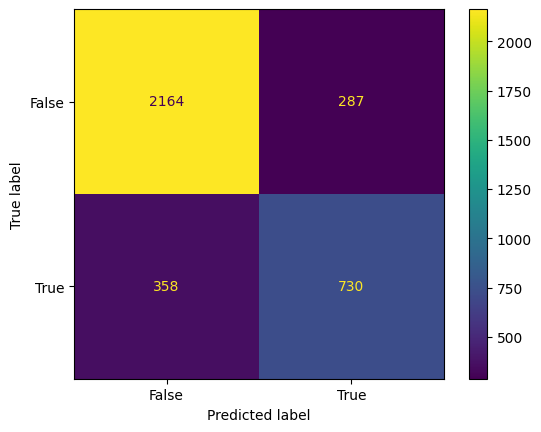

In [30]:
cfm = confusion_matrix(y_test, y_pred_tree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [31]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_tree)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_tree)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_tree)
print('F1 score: %f' % f1)

Accuracy: 0.817745
Precision: 0.717797
Recall: 0.670956
F1 score: 0.693587


### Decision Tree Classifier with Grid Search ###

In [32]:
y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [33]:
tree_clf_2 = DecisionTreeClassifier()

In [34]:
# Setting up a grid of hyper parameters
param_dict = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [5, 6, 7, 8, 8, 10, None]
}

In [35]:
grid = GridSearchCV(tree_clf_2, param_grid = param_dict, cv = 10, n_jobs = -1)

In [36]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 8, 10, None]})

In [37]:
y_pred_tree_cv = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred_tree_cv))
print(classification_report(y_test, y_pred_tree_cv))

[[2236  215]
 [ 364  724]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2451
           1       0.77      0.67      0.71      1088

    accuracy                           0.84      3539
   macro avg       0.82      0.79      0.80      3539
weighted avg       0.83      0.84      0.83      3539



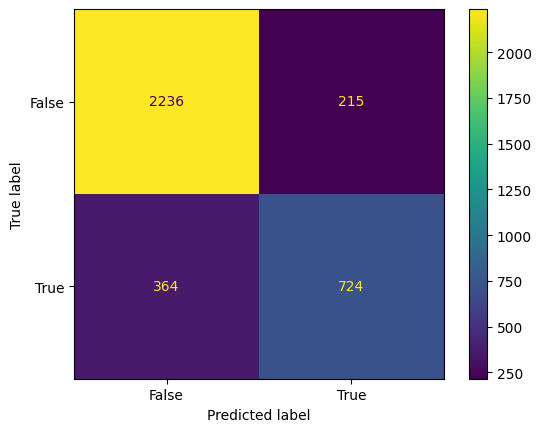

In [39]:
cfm = confusion_matrix(y_test, y_pred_tree_cv)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [40]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_tree_cv)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_tree_cv)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_tree_cv)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_tree_cv)
print('F1 score: %f' % f1)

Accuracy: 0.836394
Precision: 0.771033
Recall: 0.665441
F1 score: 0.714356


**The Decision Tree classifier resulted in a 81% accuracy when run withouth Grid Search. By tuning the hyperparameters using Grid Search, the accuracy rose to 83%**

**The best hyperparameters for the Decision Tree Classifier for the given data is a max_depth of 6 and criteria for node split as Entropy**

In [41]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

## Random Forest Without Grid Search ##

In [42]:
y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [43]:
rf_clf_1 = RandomForestClassifier(max_features = 'sqrt', max_leaf_nodes = 10)

In [44]:
rf_clf_1.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10)

In [45]:
y_pred_rf = rf_clf_1.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[2339  112]
 [ 539  549]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2451
           1       0.83      0.50      0.63      1088

    accuracy                           0.82      3539
   macro avg       0.82      0.73      0.75      3539
weighted avg       0.82      0.82      0.80      3539



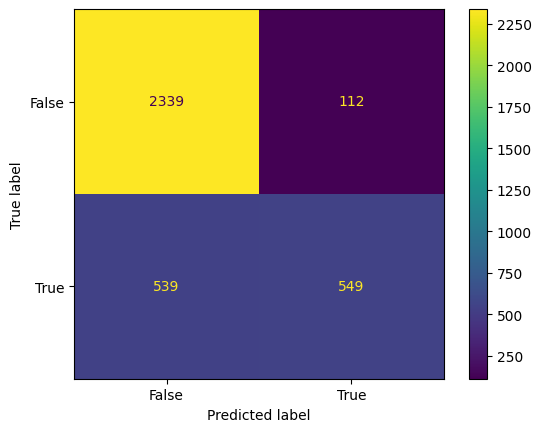

In [47]:
cfm = confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [48]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_rf)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_rf)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_rf)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_rf)
print('F1 score: %f' % f1)

Accuracy: 0.816050
Precision: 0.830560
Recall: 0.504596
F1 score: 0.627787


### Random Forest With Grid Search ##

In [49]:
y = df['h1n1_vaccine']
X = df.drop('h1n1_vaccine',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [50]:
rf_clf_2 = RandomForestClassifier()

In [51]:
param_dict = {
    'max_features' : ['log2', 'sqrt'],
    'max_leaf_nodes' : [16, 17, 18, 19, 20, None]
}

In [52]:
grid = GridSearchCV(rf_clf_2, param_grid = param_dict, cv = 10, n_jobs = -1)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'max_leaf_nodes': [16, 17, 18, 19, 20, None]})

In [54]:
y_pred_rf_cv = grid.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))

[[2277  174]
 [ 404  684]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2451
           1       0.80      0.63      0.70      1088

    accuracy                           0.84      3539
   macro avg       0.82      0.78      0.80      3539
weighted avg       0.83      0.84      0.83      3539



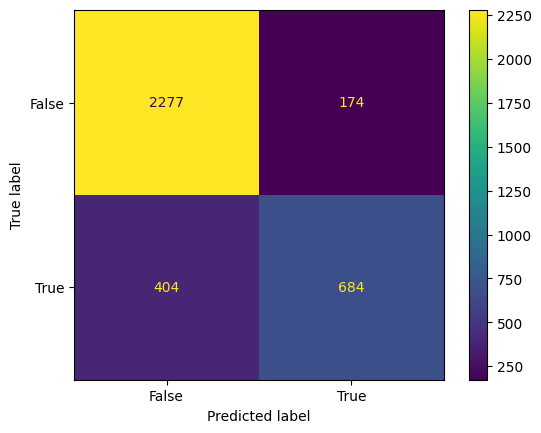

In [56]:
cfm = confusion_matrix(y_test, y_pred_rf_cv)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [57]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_rf_cv)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_rf_cv)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_rf_cv)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_rf_cv)
print('F1 score: %f' % f1)

Accuracy: 0.836677
Precision: 0.797203
Recall: 0.628676
F1 score: 0.702980


**The Random Forest ensemble classifier resulted in a 81% accuracy when run withouth Grid Search. By tuning the hyperparameters using Grid Search, the accuracy rose to 83%**

**The best hyperparameters for the Random Forest ensemble Classifier for the given data is a max_leaf_nodes of None and max_features as log2**

In [58]:
grid.best_params_

{'max_features': 'log2', 'max_leaf_nodes': None}